# An introduction to seaborn
## By Ruby with PyCall
https://seaborn.pydata.org/introduction.html

Python版のオリジナルを読み込み、カーネルをRubyに変更。おおむね下記の変更で行ける。

- モジュール読み込み部分の変更
- パラメータ引数をキーワード引数に変更
- Trueをtrue、Noneをnil、Falseをfalseに変更
- 小数点左のゼロは省略しない(例: .1は0.1)、整数の分数は結果がfloatとなるよう(例: 5/8は5.0/8とする)
- tupleはarrayに変えるか、`PyCall.Tuple.new(a,b)`などとする
- Callableは`PyCall.getattr(obj:, method)`に変更する
- Python側で、pip install tabulateが必要(もし無ければ)

## Our first seaborn plot

In [4]:
RUBY_DESCRIPTION

"ruby 3.0.2p107 (2021-07-07 revision 0db68f0233) [x86_64-linux]"

In [5]:
require 'pycall'

require 'matplotlib/iruby'
Matplotlib::IRuby.activate

sns = PyCall.import_module('seaborn')

{pycall: PyCall::VERSION, matplotlib: Matplotlib.__version__, seaborn: sns.__version__}

{:pycall=>"1.4.1", :matplotlib=>"3.5.1", :seaborn=>"0.11.2"}

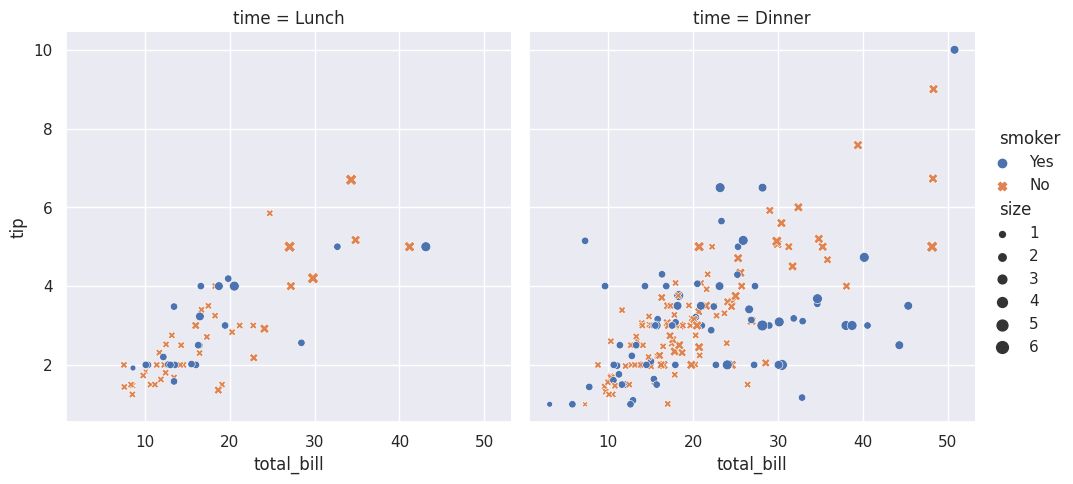

In [42]:
tips = sns.load_dataset('tips')

sns.relplot(
  data:tips,
  x:'total_bill', y:'tip',
  col:'time', hue:'smoker',
  style:'smoker', size:'size',
)

## API abstraction across visualizations

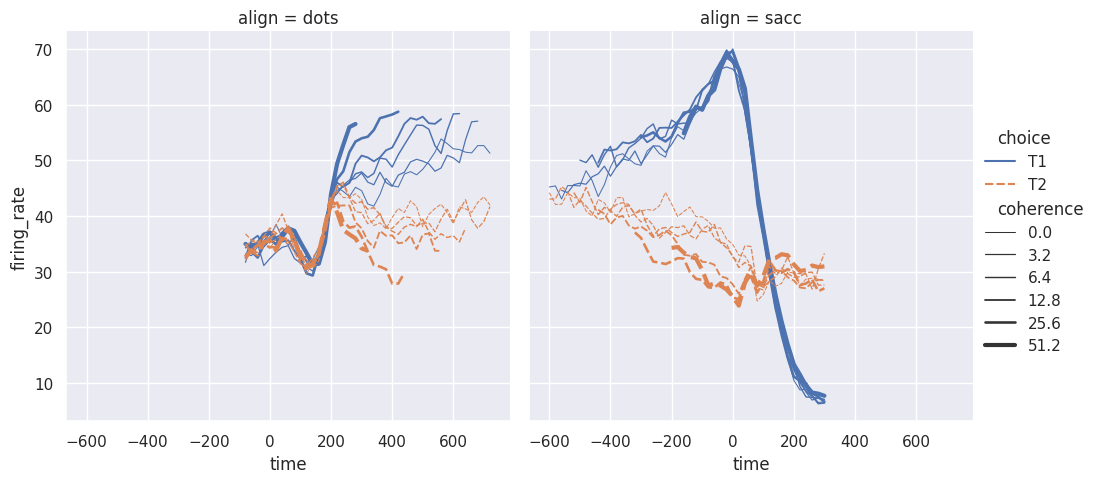

In [39]:
dots = sns.load_dataset('dots')

sns.relplot(
  data:dots, kind:'line',
  x:'time', y:'firing_rate',
  col:'align',
  hue:'choice', style:'choice', size:'coherence',
)

## Statistical estimation and error bars

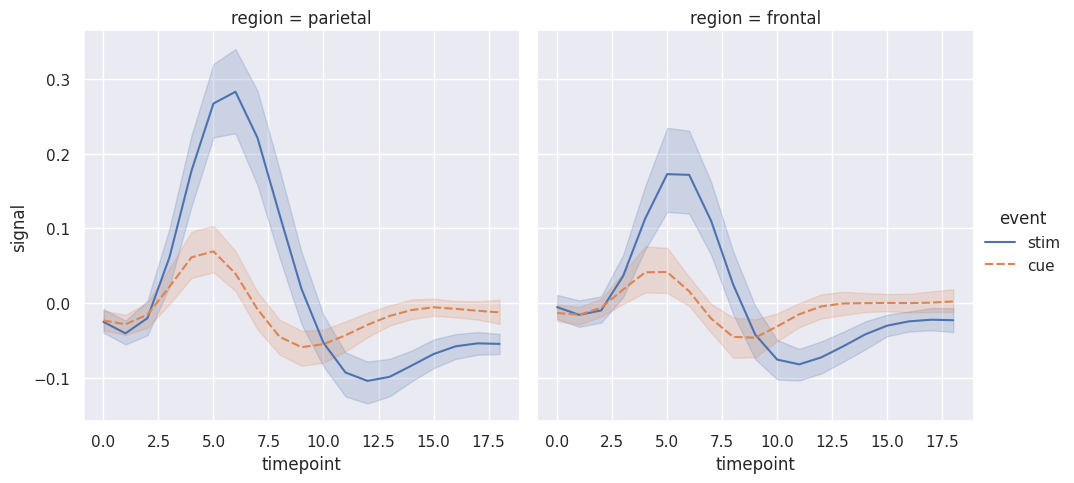

In [40]:
fmri = sns.load_dataset('fmri')

sns.relplot(
  data:fmri, kind:'line',
  x:'timepoint', y:'signal',
  col:'region',
  hue:'event', style:'event',
)

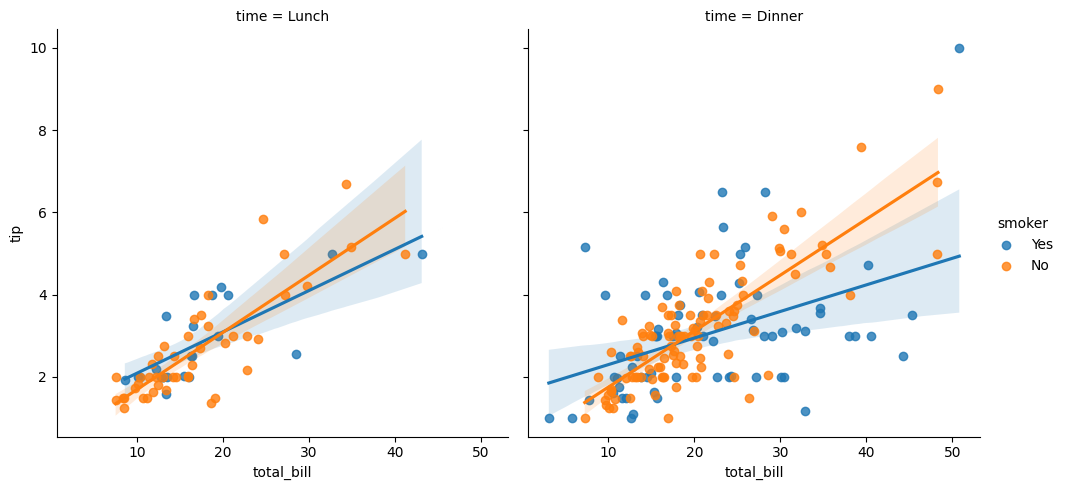

In [8]:
sns.lmplot(data:tips, x:'total_bill', y:'tip', col:'time', hue:'smoker')

## Informative distributional summaries

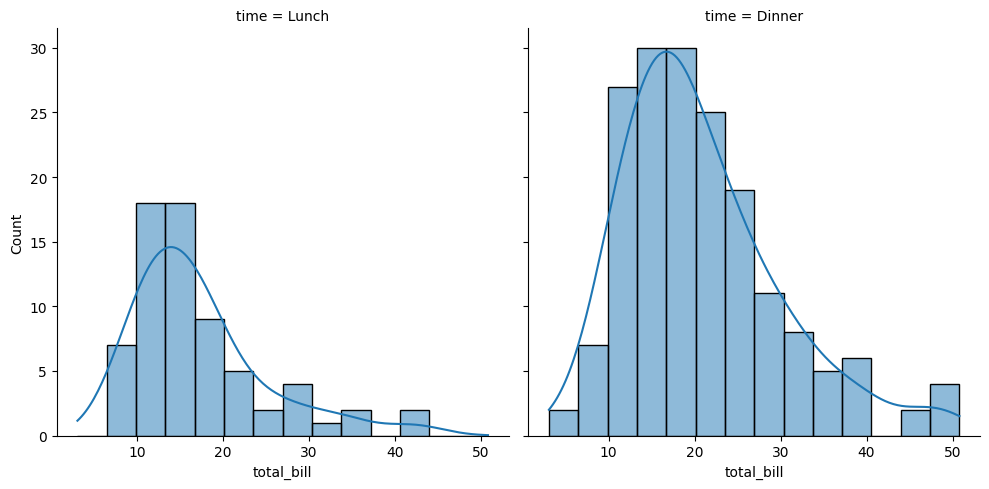

In [12]:
sns.displot(data:tips, x:'total_bill', col:'time', kde:true)

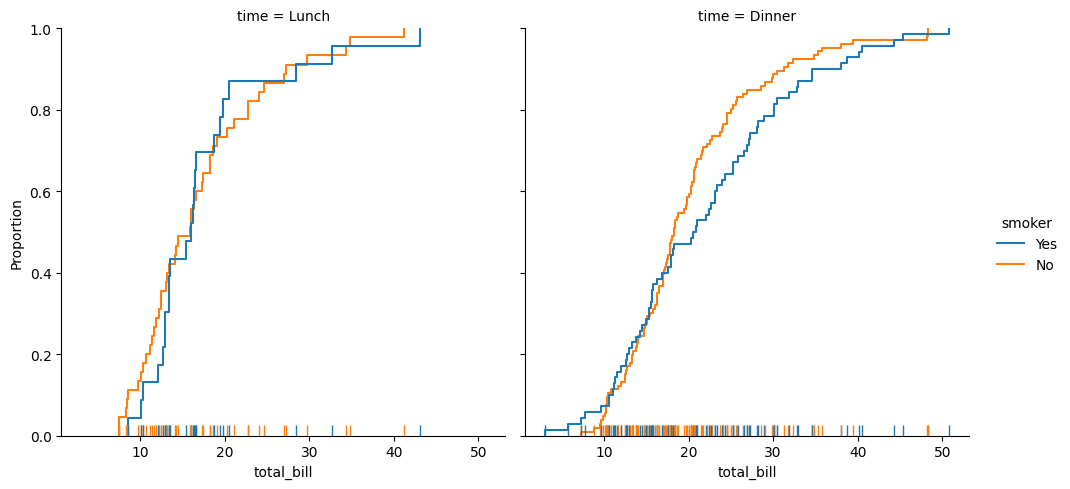

In [13]:
sns.displot(data:tips, kind:'ecdf', x:'total_bill', col:'time', hue:'smoker', rug:true)

## Specialized plots for categorical data

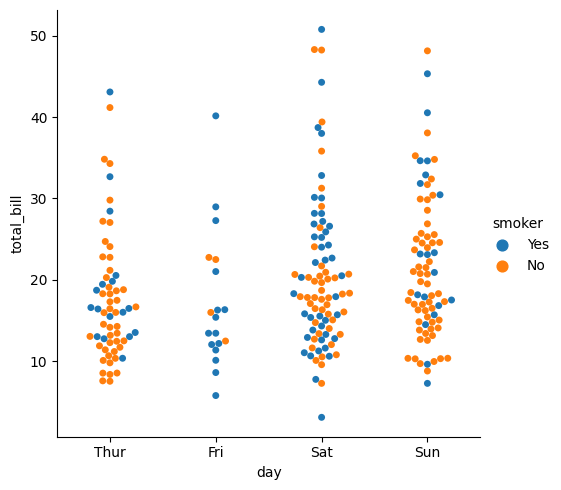

In [14]:
sns.catplot(data:tips, kind:'swarm', x:'day', y:'total_bill', hue:'smoker')

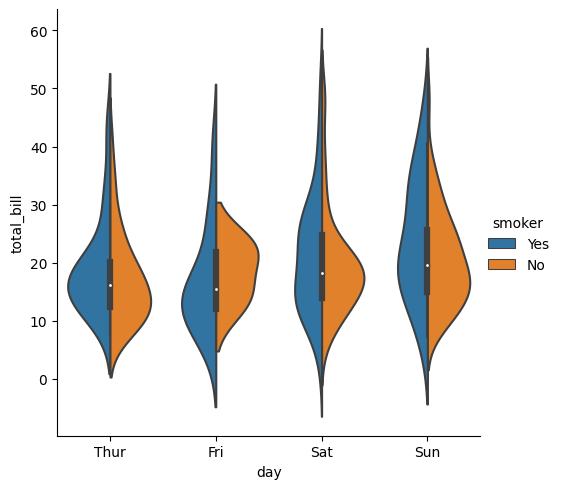

In [15]:
sns.catplot(data:tips, kind:'violin', x:'day', y:'total_bill', hue:'smoker', split:true)

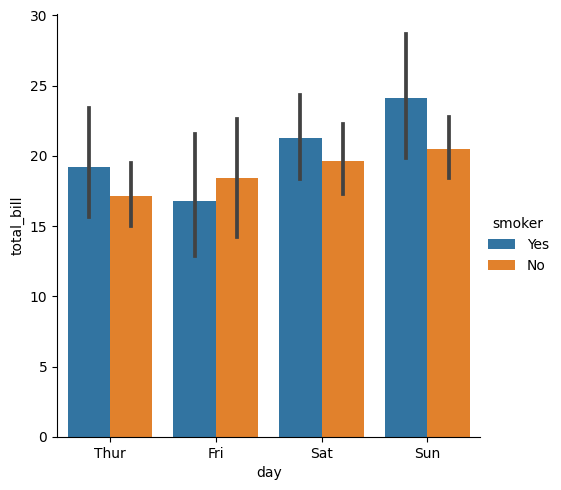

In [16]:
sns.catplot(data:tips, kind:'bar', x:'day', y:'total_bill', hue:'smoker')

## Composite views onto multivariate datasets

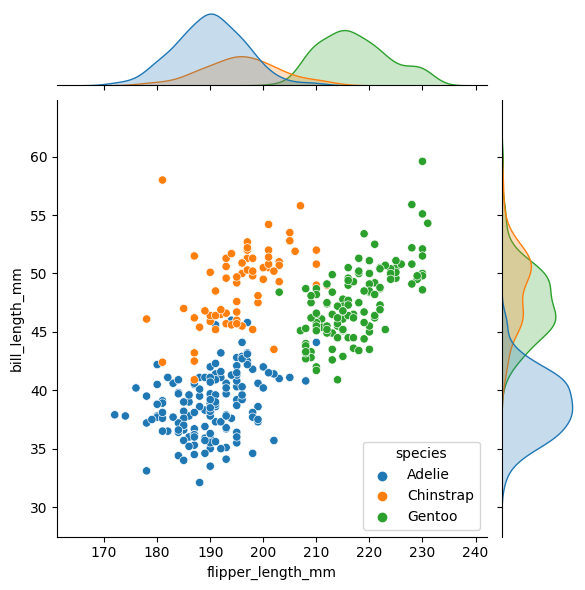

In [11]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data: penguins, x: :flipper_length_mm, y: :bill_length_mm, hue: :species)

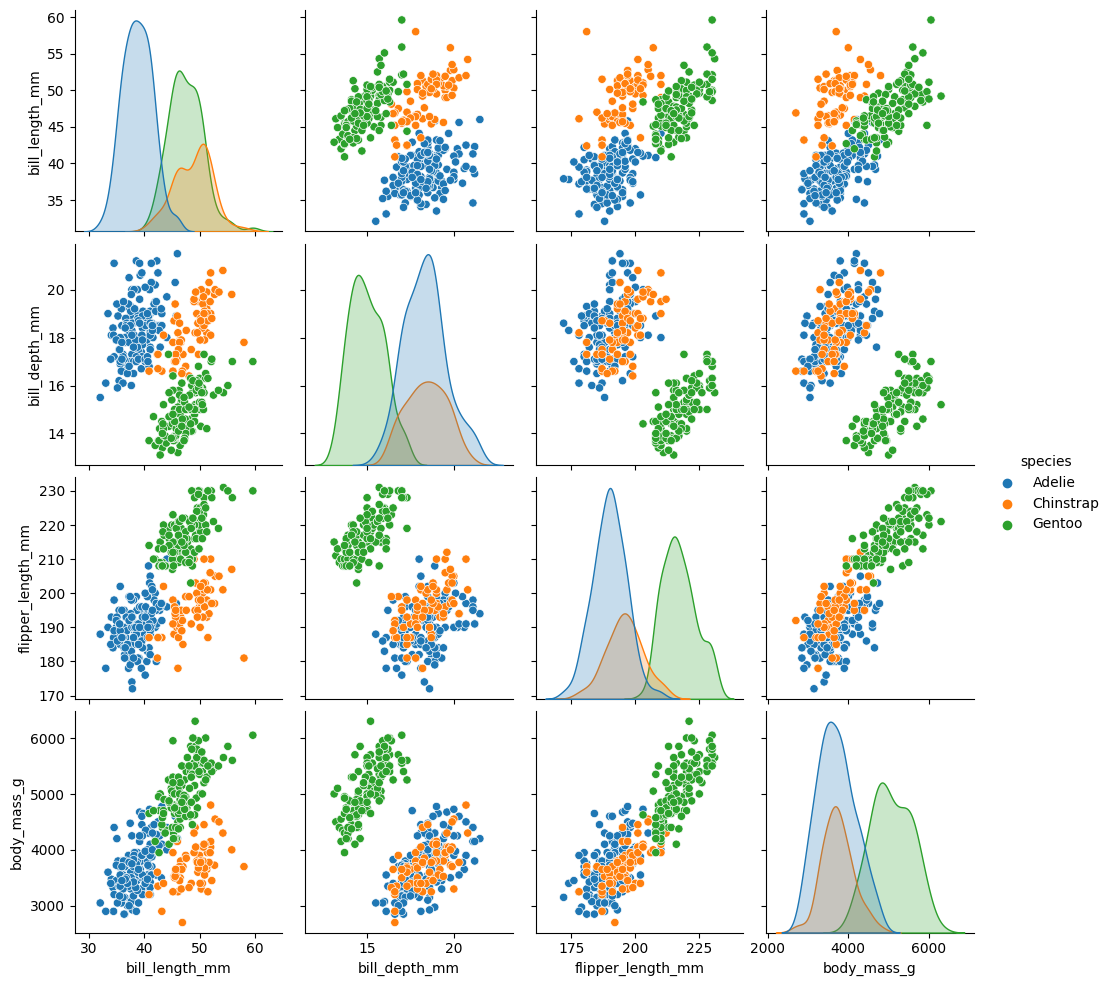

In [18]:
penguins = sns.load_dataset('penguins')
sns.pairplot(data:penguins, hue:'species')

## Classes and functions for making complex graphics

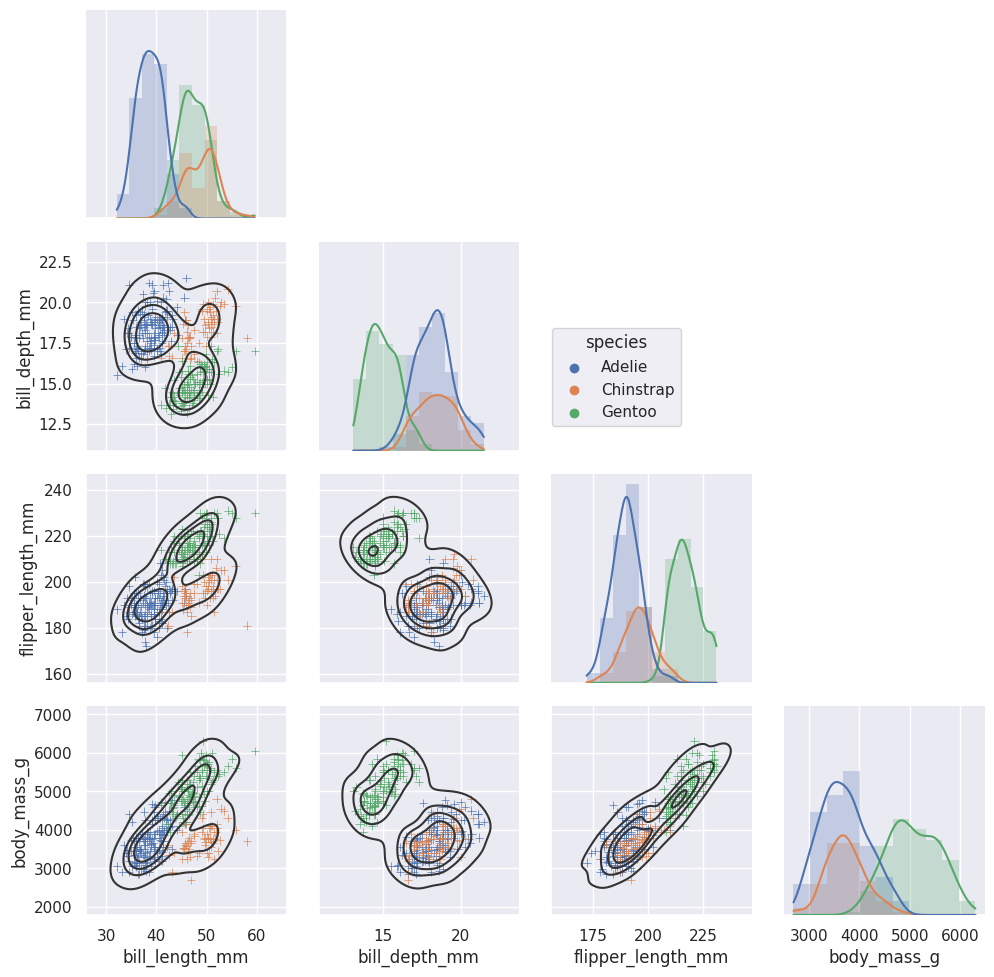

In [37]:
sns.set_theme
penguins = sns.load_dataset('penguins')
g = sns.PairGrid.new(penguins, hue:'species', corner:true)

g.map_lower(PyCall.getattr(sns, :scatterplot), marker:'+')
g.map_lower(PyCall.getattr(sns, :kdeplot), hue:nil, levels:5, color:"0.2")
g.map_diag(PyCall.getattr(sns, :histplot), element:'step', linewidth:0, kde:true)
g.add_legend(frameon:true)
g.legend.set_bbox_to_anchor([0.61, 0.6])

## Opinionated defaults and flexible customization

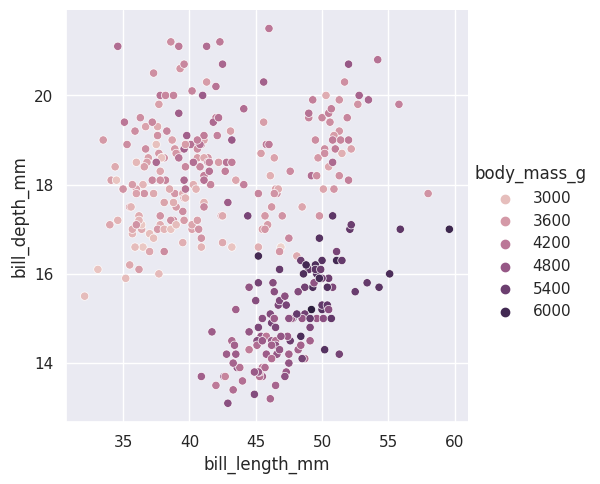

In [36]:
sns.relplot(
  data:penguins,
  x:'bill_length_mm', y:'bill_depth_mm', hue:'body_mass_g'
)

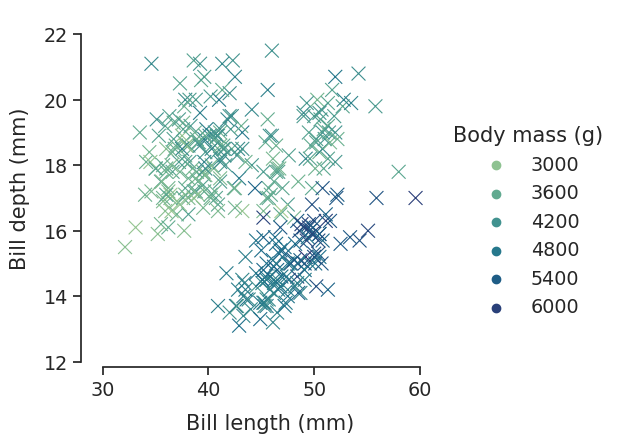

In [46]:
sns.set_theme(style:'ticks', font_scale:1.25)
g = sns.relplot(
  data:penguins,
  x:'bill_length_mm', y:'bill_depth_mm', hue:'body_mass_g',
  palette:'crest', marker:'x', s:100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad:10)
g.legend.set_title("Body mass (g)")
g.fig.set_size_inches(6.5, 4.5)
g.ax.margins(0.15)
g.despine(trim:true)